Happiness counts:
happy_num
2.0    37405
3.0    20204
1.0     9249
Name: count, dtype: int64

Marital status counts:
marital_clean
married          34873
never married    14656
divorced          8783
widowed           6274
separated         2243
Name: count, dtype: int64

Religious intensity counts:
reliten_num
2.0    22556
4.0    21354
1.0     6922
3.0     5372
Name: count, dtype: int64

Average happiness by marital status:
marital_clean
separated        1.868034
divorced         1.980075
never married    2.022039
widowed          2.027415
married          2.313480
Name: happy_num, dtype: float64

Average happiness by religious intensity:
reliten_num
1.0    2.094626
2.0    2.133180
3.0    2.183172
4.0    2.264306
Name: happy_num, dtype: float64


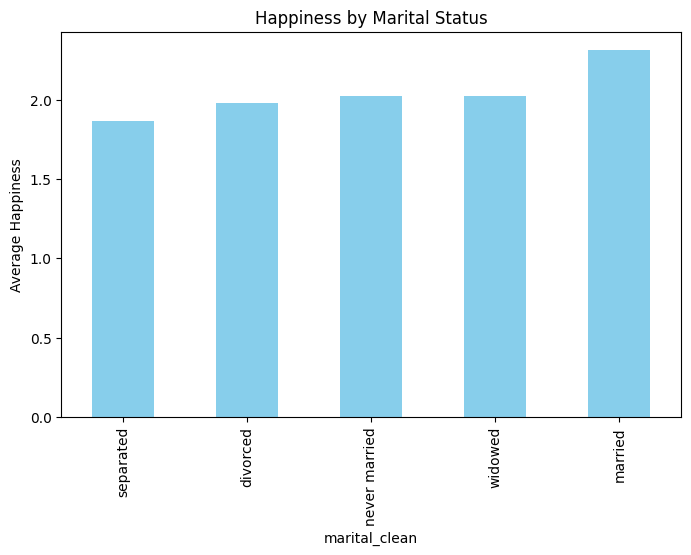

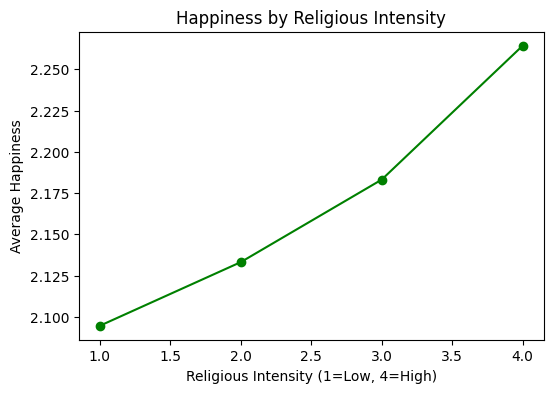

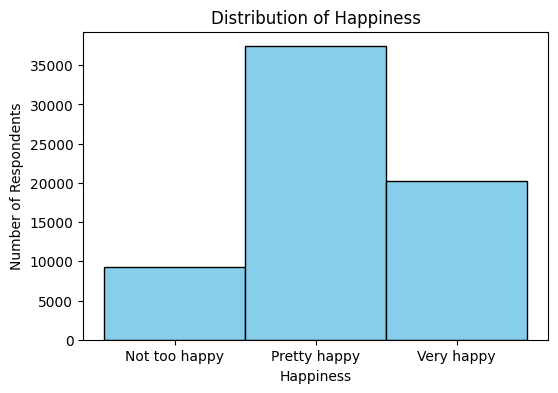

<ipython-input-1-5caff9cf006f>:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  happy_by_agegroup = df_clean.groupby('age_group')['happy_num'].mean()


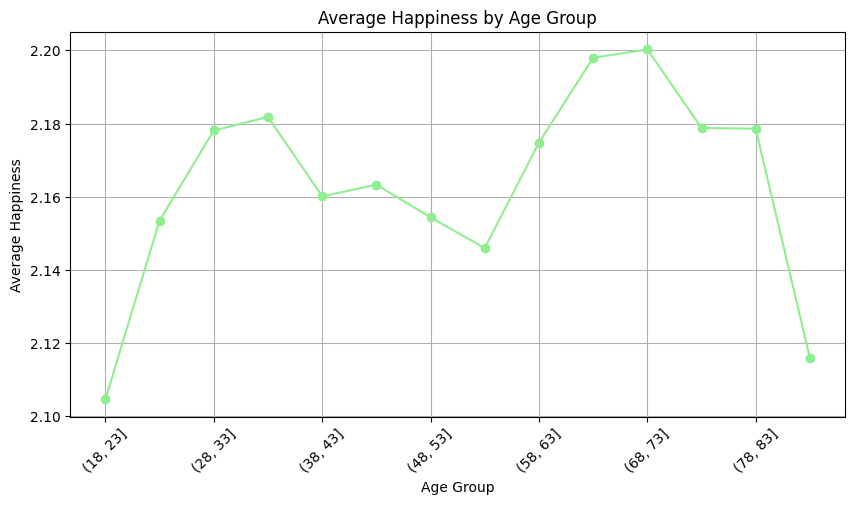

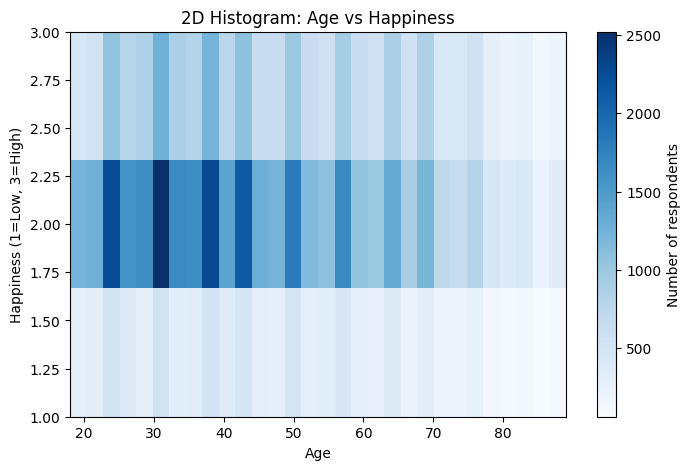

In [ ]:
# Used Chat GPT as a Guide and also worked with Ananya Kumar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#2. Data Cleaning and Preparation
#The GSS dataset contains several messy string variables and missing values, which required careful cleaning:
#- Convert string columns to lowercase and strip extra spaces: This ensures consistency for mapping categorical responses to numeric values
#- Map happiness and religious intensity to numeric scales:Happiness: 1 = Not too happy, 2 = Pretty happy, 3 = Very happy
#- Religious intensity: 1 = No religion, 2 = Not very strong, 3 = Somewhat strong, 4 = Strong
#Drop rows only where happiness is missing: Since happiness is the primary dependent variable, rows missing happy are removed. Rows missing marital or reliten are retained for partial analyses.
#- Create age groups for visualization: Ages were binned in 5-year increments to better illustrate trends in happiness across life stages.
#These steps ensure the dataset is ready for analysis while preserving as much information as possible.

# Load the CSV we just created
df = pd.read_csv('/Users/jaithajasti/Downloads/DS 3001/selected_gss_data.csv')

# Clean string columns
def clean_str(s):
    if pd.isna(s):
        return np.nan
    return s.strip().lower()

df['marital_clean'] = df['marital'].apply(clean_str)
df['happy_clean'] = df['happy'].apply(clean_str)
df['reliten_clean'] = df['reliten'].apply(clean_str)

# Clean strings first
df['reliten_clean'] = df['reliten'].astype(str).str.strip().str.lower()

# Map GSS religious intensity to numeric
# I’ll give a scale 1 = lowest, 4 = highest
reliten_map = {
    'no religion': 1,
    'not very strong': 2,
    'somewhat strong (vol.)': 3,
    'strong': 4
}

# Map GSS happiness to numeric
# 1 = lowest happiness, 3 = highest happiness
happy_map = {
    'not too happy': 1,
    'pretty happy': 2,
    'very happy': 3
}

df['reliten_num'] = df['reliten_clean'].map(reliten_map)
df['happy_num'] = df['happy_clean'].map(happy_map)
df['reliten_num'] = df['reliten_clean'].map(reliten_map)

# Drop rows where happiness is missing
df_clean = df.dropna(subset=['happy_num'])

# Quick summaries
print("Happiness counts:")
print(df_clean['happy_num'].value_counts())

print("\nMarital status counts:")
print(df_clean['marital_clean'].value_counts())

print("\nReligious intensity counts:")
print(df_clean['reliten_num'].value_counts())

# Groupby summaries
print("\nAverage happiness by marital status:")
print(df_clean.groupby('marital_clean')['happy_num'].mean().sort_values())

print("\nAverage happiness by religious intensity:")
print(df_clean.groupby('reliten_num')['happy_num'].mean())

#Visualizations

# Happiness by marital status
plt.figure(figsize=(8,5))
df_clean.groupby('marital_clean')['happy_num'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.ylabel('Average Happiness')
plt.title('Happiness by Marital Status')
plt.show()

# Happiness by religious intensity
plt.figure(figsize=(6,4))
df_clean.groupby('reliten_num')['happy_num'].mean().reindex([1,2,3,4]).plot(marker='o', color='green')
plt.xlabel('Religious Intensity (1=Low, 4=High)')
plt.ylabel('Average Happiness')
plt.title('Happiness by Religious Intensity')
plt.show()

# Happiness 
plt.figure(figsize=(6,4))
plt.hist(df_clean['happy_num'], bins=[0.5,1.5,2.5,3.5], color='skyblue', edgecolor='black')
plt.xticks([1,2,3], ['Not too happy', 'Pretty happy', 'Very happy'])
plt.xlabel('Happiness')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Happiness')
plt.show()

df_clean = df_clean.copy()
# Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], bins=range(18, 90, 5))

# Calculate average happiness per age group
happy_by_agegroup = df_clean.groupby('age_group')['happy_num'].mean()

# Plot as a line graph
plt.figure(figsize=(10,5))
happy_by_agegroup.plot(kind='line', marker='o', color='lightgreen')
plt.xticks(rotation=45)
plt.ylabel('Average Happiness')
plt.xlabel('Age Group')
plt.title('Average Happiness by Age Group')
plt.grid(True)  # optional: adds grid lines for readability
plt.show()

plt.figure(figsize=(8,5))
plt.hist2d(df_clean['age'], df_clean['happy_num'], bins=[30,3], cmap='Blues')
plt.colorbar(label='Number of respondents')
plt.xlabel('Age')
plt.ylabel('Happiness (1=Low, 3=High)')
plt.title('2D Histogram: Age vs Happiness')
plt.show()

#3. Findings
#Marital Status and Happiness: Being married is associated with slightly higher happiness on average, while divorced, separated, or widowed respondents tend to report lower happiness. This aligns with prior research suggesting social support in marriage contributes to well-being.
#Religious Intensity and Happiness: Stronger religious affiliation correlates with higher reported happiness. Those with no religion report the lowest average happiness. Religious participation may provide social support, community, and coping mechanisms that enhance well-being.
#Happiness Across the Life Cycle: Happiness shows moderate variation with age. While discrete happiness categories create a somewhat concentrated distribution, binning by age reveals subtle trends: young and middle-aged adults report slightly higher happiness, while older adults show a small decline.
#Distribution of Happiness: The dataset shows most Americans report being “pretty happy,” with fewer reporting extremes of low or very high happiness.
#Overall, these exploratory analyses indicate that social and personal factors — marital status, religious involvement, and age — are associated with general happiness, consistent with prior sociological findings.